<a href="https://colab.research.google.com/github/Ahsan-techie/KNNs/blob/main/KNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libararies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from collections import Counter

## Implemantation of KNN

In [3]:
def euclidean_distance(x_train,x_test_point):
  distances=[]
  for row in range(len(x_train)):
    current_x_train_point = x_train[row]
    current_distance=0

    for col in range(len(current_x_train_point)):
      current_distance += (current_x_train_point[col]-x_test_point[col])**2
    current_distance = np.sqrt(current_distance)
    distances.append(current_distance)
  distances = pd.DataFrame(data=distances,columns=['distances'])
  return distances

In [4]:
def nearest_neighbors(distance_point,K):
  df_nearest = distance_point.sort_values(by=['distances'],axis=0)
  df_nearest = df_nearest[:K]
  return df_nearest

In [5]:
def voting(df_nearest,y_train):
  counter_vote = Counter(y_train[df_nearest.index])
  y_pred = counter_vote.most_common()[0][0]
  return y_pred

In [6]:
def KNN_from_scratch(x_train,y_train,x_test,K):
  y_pred=[]
  for x_test_point in x_test:
    distance_point = euclidean_distance(x_train,x_test_point)
    df_nearest_point = nearest_neighbors(distance_point,K)
    y_pred_point = voting(df_nearest_point,y_train)
    y_pred.append(y_pred_point)
  return y_pred

## Exploring the dataset

In [7]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                       columns=iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
X = iris_df.iloc[:,:-1]
y = iris['target']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 shuffle=True,
                                                 random_state=0)
X_train = np.asanyarray(X_train)
X_test = np.asanyarray(X_test)
y_train = np.asanyarray(y_train)
y_test = np.asanyarray(y_test)

In [11]:
print(f"traing set size:{X_train.shape[0]} sample \ntest set size: {X_test.shape[0]} samples")

traing set size:120 sample 
test set size: 30 samples


## Normalize Dataset

In [12]:
normalized_X_train = Normalizer().fit_transform(X_train)
normalized_X_test = Normalizer().transform(X_test)


In [13]:
print("X train before normalization")
print(X_train[:5])
print("\nX train after normalization")
print(normalized_X_train[:5])


X train before normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

X train after normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


## Visualization

Text(0.5, 1.08, 'Pair Plot of the dataset after normalization')

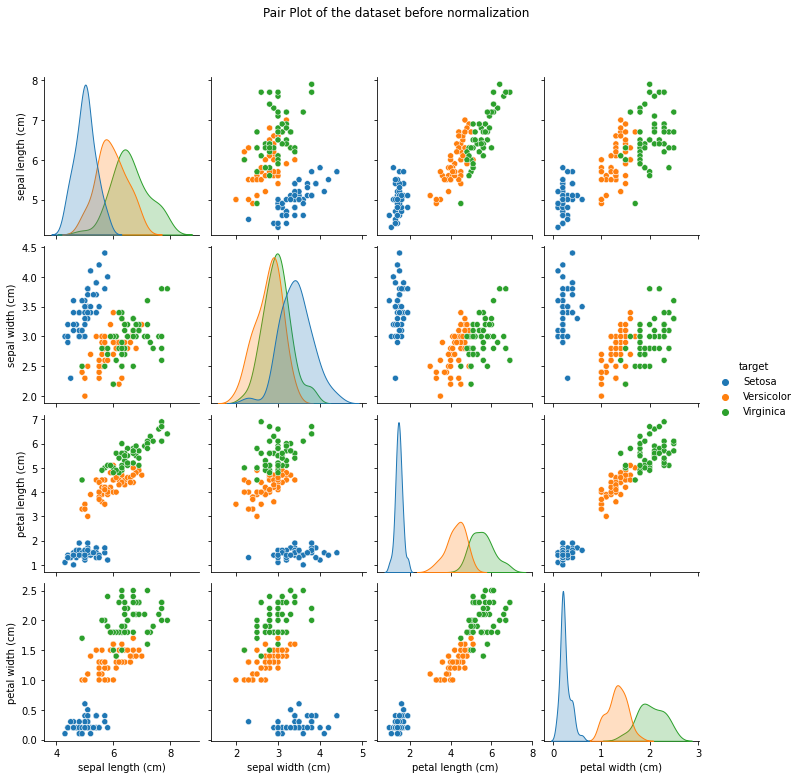

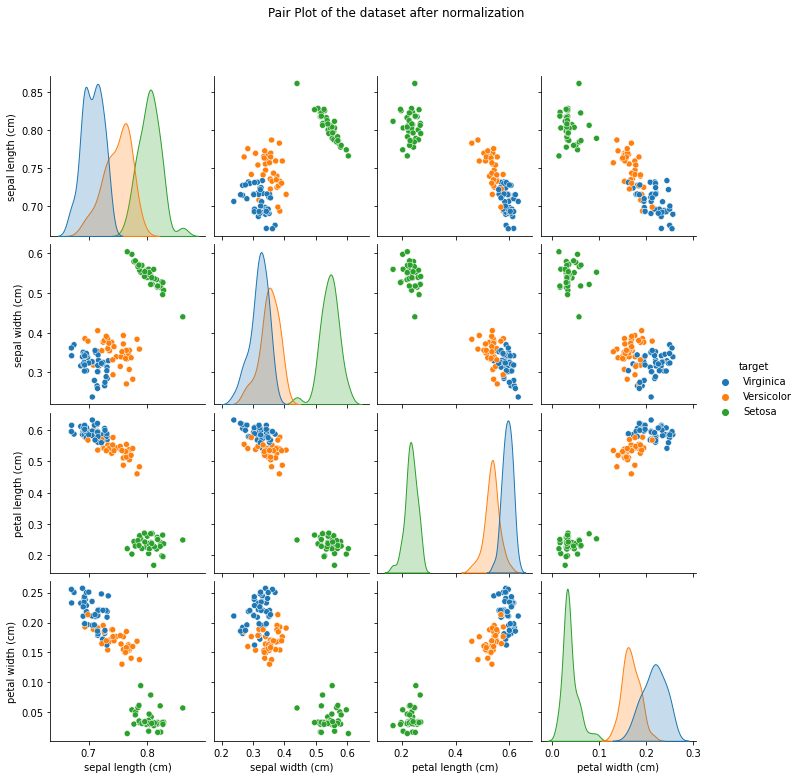

In [14]:
di = {0.0:"Setosa",1.0:"Versicolor",2.0:"Virginica"}

before = sns.pairplot(iris_df.replace({"target":di}),hue='target')
before.fig.suptitle("Pair Plot of the dataset before normalization",y=1.08)

iris_df2 = pd.DataFrame(data=np.c_[normalized_X_train,y_train],
                        columns=iris['feature_names']+['target'])
di2 = {0.0:"Setosa",1.0:"Versicolor",2.0:"Virginica"}
after = sns.pairplot(iris_df2.replace({'target':di2}),hue='target')
after.fig.suptitle("Pair Plot of the dataset after normalization",y=1.08)

In [15]:
K=3
y_pred_scratch = KNN_from_scratch(normalized_X_train,y_train,normalized_X_test,K)
print(y_pred_scratch)

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0]


In [16]:
## comparing results with sklearn library

In [17]:
knn = KNeighborsClassifier(K)
knn.fit(normalized_X_train,y_train)
y_pred_sklearn = knn.predict(normalized_X_test)
print(y_pred_sklearn)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 2 0 0 2 1 0 0 2 0 0 1 1 0]


In [18]:
print(np.array_equal(y_pred_sklearn,y_pred_scratch))

True


In [19]:
print(f'Accuracy of our implementation is {accuracy_score(y_test,y_pred_scratch)}')
print(f'Accuracy of sklearn implementation is {accuracy_score(y_test,y_pred_sklearn)}')

Accuracy of our implementation is 0.9666666666666667
Accuracy of sklearn implementation is 0.9666666666666667


In [20]:
## hyperparameters tuning

n_splits = 4
kf = KFold(n_splits=n_splits)
accuracy_k =[]
k_values = list(range(1,30,2))

for k in k_values:
  accuracy_fold=0
  for normalized_X_train_fold_idx,normalized_X_valid_fold_idx in kf.split(normalized_X_train):
    normalized_X_train_fold = normalized_X_train[normalized_X_train_fold_idx]
    y_train_fold = y_train[normalized_X_train_fold_idx]

    normalized_X_test_fold = normalized_X_train[normalized_X_valid_fold_idx]
    y_valid_fold = y_train[normalized_X_valid_fold_idx]
    y_pred_fold = KNN_from_scratch(normalized_X_train_fold,y_train_fold,normalized_X_test_fold,k)

    accuracy_fold += accuracy_score(y_pred_fold,y_valid_fold)
  accuracy_fold = accuracy_fold/n_splits
  accuracy_k.append(accuracy_fold)



In [21]:
print(f"The accuracy for each k value{list(zip(accuracy_k,k_values))}")

The accuracy for each k value[(0.9666666666666668, 1), (0.9666666666666668, 3), (0.9666666666666668, 5), (0.9666666666666668, 7), (0.9583333333333333, 9), (0.9583333333333333, 11), (0.9583333333333334, 13), (0.95, 15), (0.9583333333333333, 17), (0.9583333333333333, 19), (0.9583333333333333, 21), (0.9583333333333333, 23), (0.9583333333333333, 25), (0.9583333333333333, 27), (0.9583333333333333, 29)]


In [22]:
print(f"Best accuracy is {np.max(accuracy_k)}, which corresponds to K value  = {k_values[np.argmax(accuracy_k)]}")

Best accuracy is 0.9666666666666668, which corresponds to K value  = 1
